In [10]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_style("white")

---

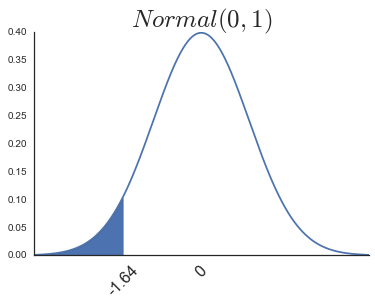

In [102]:
xgrid = np.linspace(-3.5, 3.5, 1000)
pdf = ss.norm(0, 1).pdf(xgrid)

fig, ax = plt.subplots(1)
ax.plot(xgrid, pdf)
c = 1.64
ticks = [-c, 0]
ax.set_xticks(ticks)
ax.fill_between(xgrid[xgrid < -c], pdf[xgrid < -c])
#ax.fill_between(xgrid[xgrid > c], pdf[xgrid > c])
ax.set_xticklabels(ticks, rotation = 45, fontsize = 16);
ax.set_title("$Normal(0,1)$", fontsize = 25)
sns.despine()
fig.savefig("na")

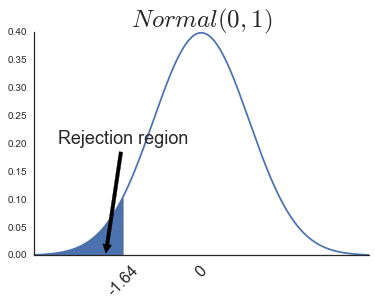

In [111]:
xgrid = np.linspace(-3.5, 3.5, 1000)
pdf = ss.norm(0, 1).pdf(xgrid)

fig, ax = plt.subplots(1)
ax.plot(xgrid, pdf)
c = 1.64
ticks = [-c, 0]
ax.set_xticks(ticks)
ax.fill_between(xgrid[xgrid < -c], pdf[xgrid < -c])
#ax.fill_between(xgrid[xgrid > c], pdf[xgrid > c])
ax.set_xticklabels(ticks, rotation = 45, fontsize = 16);
ax.set_title("$Normal(0,1)$", fontsize = 25)
sns.despine()
ax.annotate(s = "Rejection region", xy = (-2, 0), xytext = (-3, .2), 
            arrowprops=dict(arrowstyle = "simple", color = "black"), fontsize = 18)
fig.savefig("nb")

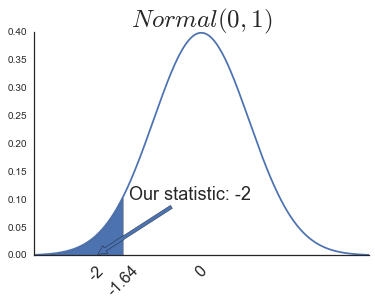

In [114]:
xgrid = np.linspace(-3.5, 3.5, 1000)
pdf = ss.norm(0, 1).pdf(xgrid)

fig, ax = plt.subplots(1)
ax.plot(xgrid, pdf)
c = 1.64
ticks = [-2.2, -c, 0]
ax.set_xticks(ticks)
ax.fill_between(xgrid[xgrid < -c], pdf[xgrid < -c])
#ax.fill_between(xgrid[xgrid > c], pdf[xgrid > c])
ax.set_xticklabels([-2, -1.64, 0], rotation = 45, fontsize = 16);
ax.set_title("$Normal(0,1)$", fontsize = 25)
sns.despine()
ax.annotate(s = "Our statistic: -2", xy = (-2.2, 0), xytext = (-1.5, .1), 
            arrowprops=dict(arrowstyle = "simple"), fontsize = 18)
fig.savefig("nc")

---

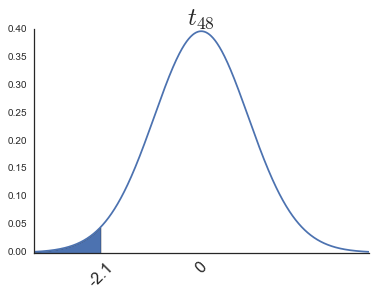

In [116]:
xgrid = np.linspace(-3.5, 3.5, 1000)
pdf = ss.t(df = 48).pdf(xgrid)

fig, ax = plt.subplots(1)
ax.plot(xgrid, pdf)
ticks = [-2.1, 0]
ax.set_xticks(ticks)
ax.fill_between(xgrid[xgrid < -2.1], pdf[xgrid < -2.1])
#ax.fill_between(xgrid[xgrid > 2.1], pdf[xgrid > 2.1])
ax.set_xticklabels(ticks, rotation = 45, fontsize = 16);
ax.set_title("$t_{48}$", fontsize = 25)
sns.despine()
fig.savefig("t48a")

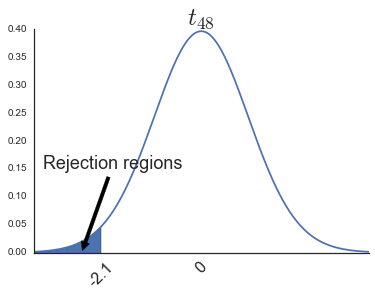

In [120]:
xgrid = np.linspace(-3.5, 3.5, 1000)
pdf = ss.t(df = 48).pdf(xgrid)

fig, ax = plt.subplots(1)
ax.plot(xgrid, pdf)
ticks = [-2.1, 0]
ax.set_xticks(ticks)
ax.fill_between(xgrid[xgrid < -2.1], pdf[xgrid < -2.1])
#ax.fill_between(xgrid[xgrid > 2.1], pdf[xgrid > 2.1])
ax.set_xticklabels(ticks, rotation = 45, fontsize = 16);
ax.set_title("$t_{48}$", fontsize = 25)
ax.annotate(s = "Rejection regions", xy = (-2.5, 0), xytext = (-3.3, .15), 
            arrowprops=dict(arrowstyle = "simple", color = "black"), fontsize = 18)
sns.despine()
fig.savefig("t48b")

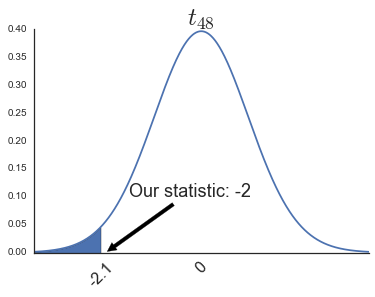

In [122]:
xgrid = np.linspace(-3.5, 3.5, 1000)
pdf = ss.t(df = 48).pdf(xgrid)

fig, ax = plt.subplots(1)
ax.plot(xgrid, pdf)
ticks = [-2.1, 0]
ax.set_xticks(ticks)
ax.fill_between(xgrid[xgrid < -2.1], pdf[xgrid < -2.1])
ax.set_xticklabels(ticks, rotation = 45, fontsize = 16);
ax.set_title("$t_{48}$", fontsize = 25)
ax.annotate(s = "Our statistic: -2", xy = (-2, 0), xytext = (-1.5, .1), 
            arrowprops=dict(arrowstyle = "simple", color = "black"), fontsize = 18)
sns.despine()
fig.savefig("t48c")

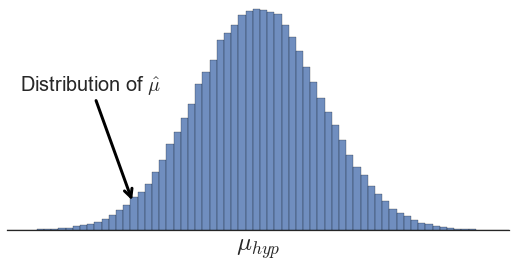

In [79]:
def monte_carlo(sigmasq, n_sims, n):
    X = ss.norm(2, np.sqrt(sigmasq)).rvs((n_sims, n)) # Draw Normal(2, s^2)
    mc_draws = np.mean(X, axis = 1) # Std of each row
    return mc_draws

a = .1

fig, ax = plt.subplots(1, figsize = (9, 4))
sims = monte_carlo(sigmasq = 4, n_sims = 200000, n = 16)
    
ax.annotate("Distribution of $\hat{\mu}$", xy=(1, .1), xytext=(.1, .5), fontsize = 20,
        arrowprops=dict(arrowstyle="->", linewidth = 3))
    
n, bins, patches = ax.hist(sims, bins = 80, alpha = .8, label = "$\\alpha = %2.2f$" % a, 
                           normed = True);
rejection_region1 = np.cumsum(np.diff(bins)*n) < a/2
rejection_region2 = np.cumsum(np.diff(bins)*n) > 1 - a/2
rejection_region = rejection_region1 | rejection_region2

sns.despine(left = True)
ax.set_yticklabels("")
ax.set_xlim([0, 4])    
ax.set_xticks([2])
ax.set_xticklabels(["$\\mu_{hyp}$"], fontsize = 25)
fig.savefig("ci0")

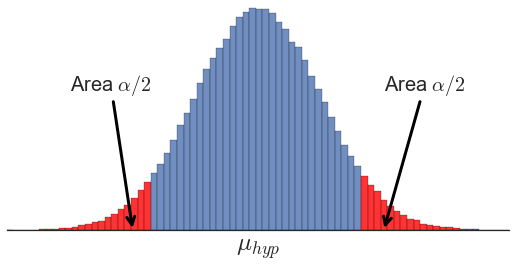

In [80]:
def monte_carlo(sigmasq, n_sims, n):
    X = ss.norm(2, np.sqrt(sigmasq)).rvs((n_sims, n)) # Draw Normal(2, s^2)
    mc_draws = np.mean(X, axis = 1) # Std of each row
    return mc_draws

a = .1

fig, ax = plt.subplots(1, figsize = (9, 4))
sims = monte_carlo(sigmasq = 4, n_sims = 200000, n = 16)
    
n, bins, patches = ax.hist(sims, bins = 80, alpha = .8, label = "$\\alpha = %2.2f$" % a, 
                           normed = True);
rejection_region1 = np.cumsum(np.diff(bins)*n) < a/2
rejection_region2 = np.cumsum(np.diff(bins)*n) > 1 - a/2
rejection_region = rejection_region1 | rejection_region2
for p, r in zip(patches, rejection_region):
    if r == True:
        plt.setp(p, 'facecolor', "red")

ax.annotate("Area $\\alpha/2$", xy=(1, 0), xytext=(0.5, .5), fontsize = 20,
        arrowprops=dict(arrowstyle="->", linewidth = 3))
ax.annotate("Area $\\alpha/2$", xy=(3, 0), xytext=(3, .5), fontsize = 20,
        arrowprops=dict(arrowstyle="->", linewidth = 3))
sns.despine(left = True)
ax.set_yticklabels("")
ax.set_xlim([0, 4])    
ax.set_xticks([2])
ax.set_xticklabels(["$\\mu_{hyp}$"], fontsize = 25)
fig.savefig("ci1")

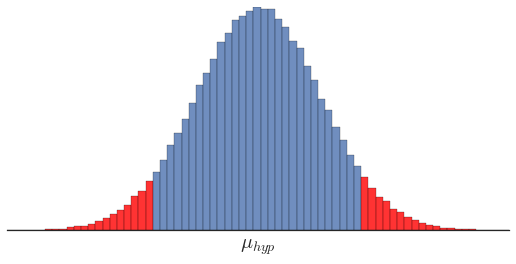

In [87]:
def monte_carlo(sigmasq, n_sims, n):
    X = ss.norm(2, np.sqrt(sigmasq)).rvs((n_sims, n)) # Draw Normal(2, s^2)
    mc_draws = np.mean(X, axis = 1) # Std of each row
    return mc_draws

a = .1

fig, ax = plt.subplots(1, figsize = (9, 4))
sims = monte_carlo(sigmasq = 4, n_sims = 200000, n = 16)
    
n, bins, patches = ax.hist(sims, bins = 80, alpha = .8, label = "$\\alpha = %2.2f$" % a, 
                           normed = True);
rejection_region1 = np.cumsum(np.diff(bins)*n) < a/2
rejection_region2 = np.cumsum(np.diff(bins)*n) > 1 - a/2
rejection_region = rejection_region1 | rejection_region2
for p, r in zip(patches, rejection_region):
    if r == True:
        plt.setp(p, 'facecolor', "red")

sns.despine(left = True)
ax.set_yticklabels("")
ax.set_xlim([0, 4])    
ax.set_xticks([2])
ax.set_xticklabels(["$\\mu_{hyp}$"], fontsize = 20)
fig.savefig("ci2")

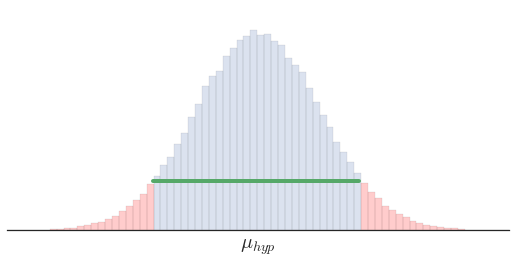

In [86]:
def monte_carlo(sigmasq, n_sims, n):
    X = ss.norm(2, np.sqrt(sigmasq)).rvs((n_sims, n)) # Draw Normal(2, s^2)
    mc_draws = np.mean(X, axis = 1) # Std of each row
    return mc_draws

a = .1


fig, ax = plt.subplots(1, figsize = (9, 4))
sims = monte_carlo(sigmasq = 4, n_sims = 200000, n = 16)
    
n, bins, patches = ax.hist(sims, bins = 80, alpha = .2, label = "$\\alpha = %2.2f$" % a, 
                           normed = True);
rejection_region1 = np.cumsum(np.diff(bins)*n) < a/2
rejection_region2 = np.cumsum(np.diff(bins)*n) > 1 - a/2
rejection_region = rejection_region1 | rejection_region2
for p, r in zip(patches, rejection_region):
    if r == True:
        plt.setp(p, 'facecolor', "red")

ax.plot([1.16, 2.8], [.2, .2], linewidth = 4)

sns.despine(left = True)
ax.set_yticklabels("")
ax.set_xlim([0, 4])    
ax.set_xticks([2])
ax.set_xticklabels(["$\\mu_{hyp}$"], fontsize = 20)
fig.savefig("ci3")

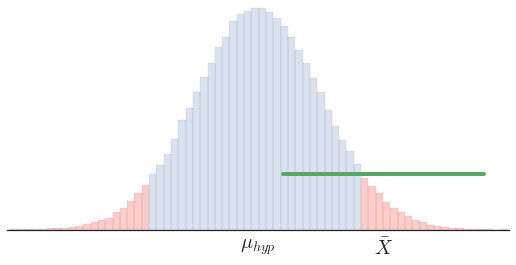

In [83]:
def monte_carlo(sigmasq, n_sims, n):
    X = ss.norm(2, np.sqrt(sigmasq)).rvs((n_sims, n)) # Draw Normal(2, s^2)
    mc_draws = np.mean(X, axis = 1) # Std of each row
    return mc_draws

a = .1


fig, ax = plt.subplots(1, figsize = (9, 4))
sims = monte_carlo(sigmasq = 4, n_sims = 200000, n = 16)
    
n, bins, patches = ax.hist(sims, bins = 80, alpha = .2, label = "$\\alpha = %2.2f$" % a, 
                           normed = True);
rejection_region1 = np.cumsum(np.diff(bins)*n) < a/2
rejection_region2 = np.cumsum(np.diff(bins)*n) > 1 - a/2
rejection_region = rejection_region1 | rejection_region2
for p, r in zip(patches, rejection_region):
    if r == True:
        plt.setp(p, 'facecolor', "red")

muhat = 3
ax.plot([muhat - .8, muhat + .8], [.2, .2], linewidth = 4)

sns.despine(left = True)
ax.set_yticklabels("")
ax.set_xlim([0, 4])    
ax.set_xticks([2, muhat])
ax.set_xticklabels(["$\\mu_{hyp}$", "$\\bar{X}$"], fontsize = 20)
fig.savefig("ci4")

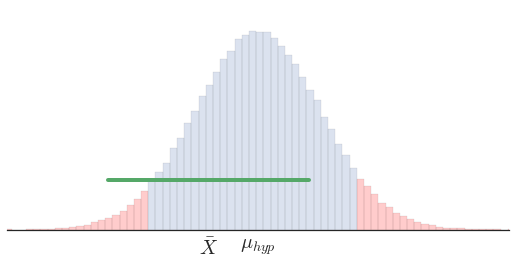

In [84]:
def monte_carlo(sigmasq, n_sims, n):
    X = ss.norm(2, np.sqrt(sigmasq)).rvs((n_sims, n)) # Draw Normal(2, s^2)
    mc_draws = np.mean(X, axis = 1) # Std of each row
    return mc_draws

a = .1


fig, ax = plt.subplots(1, figsize = (9, 4))
sims = monte_carlo(sigmasq = 4, n_sims = 200000, n = 16)
    
n, bins, patches = ax.hist(sims, bins = 80, alpha = .2, label = "$\\alpha = %2.2f$" % a, 
                           normed = True);
rejection_region1 = np.cumsum(np.diff(bins)*n) < a/2
rejection_region2 = np.cumsum(np.diff(bins)*n) > 1 - a/2
rejection_region = rejection_region1 | rejection_region2
for p, r in zip(patches, rejection_region):
    if r == True:
        plt.setp(p, 'facecolor', "red")

muhat = 1.6
ax.plot([muhat - .8, muhat + .8], [.2, .2], linewidth = 4)

sns.despine(left = True)
ax.set_yticklabels("")
ax.set_xlim([0, 4])    
ax.set_xticks([2, muhat])
ax.set_xticklabels(["$\\mu_{hyp}$", "$\\bar{X}$"], fontsize = 20)
fig.savefig("ci5")

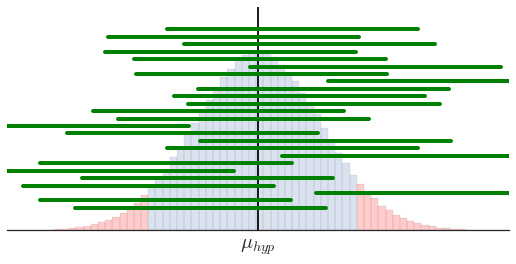

In [85]:
def monte_carlo(sigmasq, n_sims, n):
    X = ss.norm(2, np.sqrt(sigmasq)).rvs((n_sims, n)) # Draw Normal(2, s^2)
    mc_draws = np.mean(X, axis = 1) # Std of each row
    return mc_draws

a = .1


fig, ax = plt.subplots(1, figsize = (9, 4))
mu_sim = monte_carlo(sigmasq = 4, n_sims = 200000, n = 5)
L_sim = mu_sim - 1
U_sim = mu_sim + 1
for i,y in enumerate(np.linspace(0.1, .9, 25)):
    ax.plot([L_sim[i], U_sim[i]], [y, y], linewidth = 4, color = "green")

n, bins, patches = ax.hist(sims, bins = 80, alpha = .2, label = "$\\alpha = %2.2f$" % a, 
                           normed = True);
rejection_region1 = np.cumsum(np.diff(bins)*n) < a/2
rejection_region2 = np.cumsum(np.diff(bins)*n) > 1 - a/2
rejection_region = rejection_region1 | rejection_region2
for p, r in zip(patches, rejection_region):
    if r == True:
        plt.setp(p, 'facecolor', "red")

ax.vlines(2, 0, 1)

sns.despine(left = True)
ax.set_yticklabels("")
ax.set_xlim([0, 4])    
ax.set_xticks([2])
ax.set_xticklabels(["$\\mu_{hyp}$"], fontsize = 20)
fig.savefig("ci6")

---

In [95]:
x = np.linspace(-3, 3, 10)
y = 2 + 3*x + np.random.normal(0, 1, 10)
data = pd.DataFrame({"x":x, "y":y})

In [96]:
import statsmodels.formula.api as smf

In [97]:
smf.ols("y ~ x", data= data).fit().summary()

/Users/vitorhadad/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 07 Dec 2016   Prob (F-statistic):           7.58e-07
Time:                        14:37:52   Log-Likelihood:                -15.842
No. Observations:                  10   AIC:                             35.68
Df Residuals:                       8   BIC:                             36.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.1958      0.417      5.265      0.001         1.234     3.158
x              2.9933      0.218     13.742      0.000         2.491     3.496
==============================================================================
Omnibus:                        0.156   Durbin-Watson:                   2.795
Prob(Omnibus):                  0.925   Jarque-Bera (JB):                0.241
Skew:                          -0.216   Prob(JB):                        0.886
Kurtosis:                       2.374   Cond. No.                         1.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""